## Image Filters

This notebook demonstrates the application of various image filters as specified in the assignment. We will cover:

*   Reading and preparing images.
*   Applying a 3x3 Mean filter for smoothing.
*   Applying gradient filters (Roberts, Prewitt, Sobel) for edge detection using `cv2.filter2D`.
*   Comparing the custom Sobel filter implementation with OpenCV's built-in `cv2.Sobel` function.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display multiple images for comparison
def show_images(images, titles, figsize=(15, 8)):
    """Displays a list of images with their corresponding titles."""
    if len(images) != len(titles):
        print("The number of images and titles must be the same.")
        return
    
    n = len(images)
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, n, i + 1)
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

### Read the two images (image1.jpg & image2.jpg)


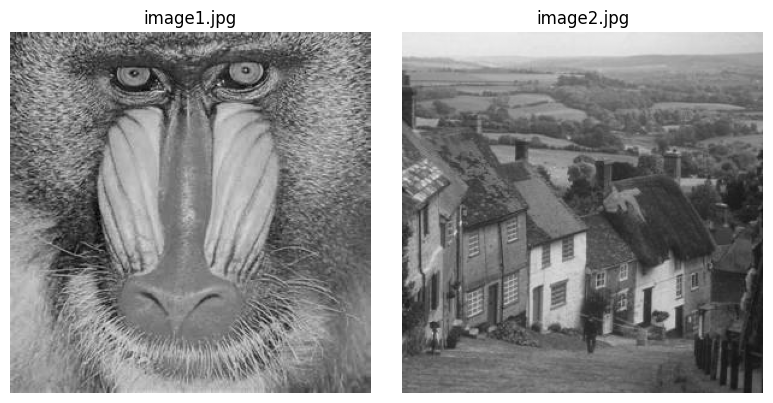

In [2]:
img1 = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

show_images(images=[img1, img2], titles=['image1.jpg', 'image2.jpg'], figsize=(8, 4))

### Apply a 3 x 3 mean filter on it.

A mean filter is a simple smoothing filter. It replaces each pixel's value with the average (mean) value of its neighbors, including itself. This has the effect of reducing noise and blurring the image.

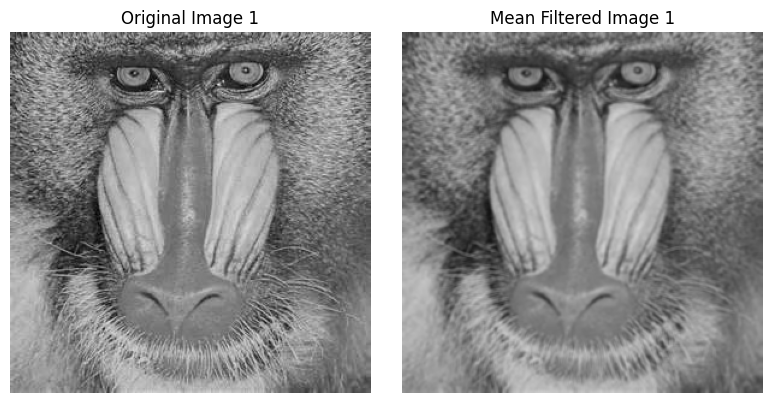

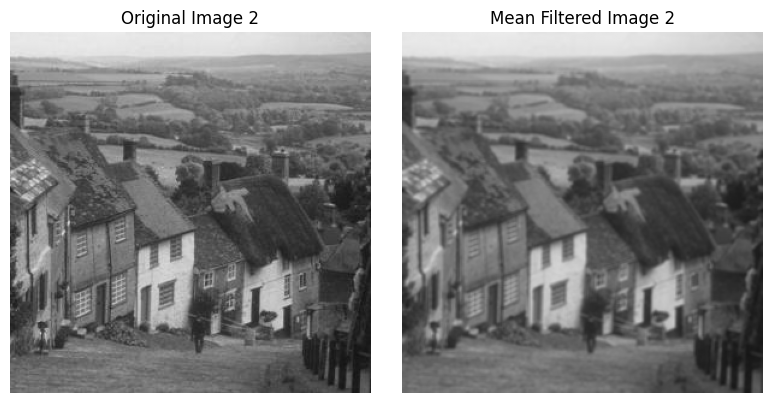

In [3]:
# Define the 3x3 mean filter kernel
mean_kernel = np.ones((3, 3), np.float32) / 9

# Apply the mean filter to both images using cv2.filter2D
# ddepth=-1 means the output image will have the same depth as the source
image1_mean = cv2.filter2D(src=img1, ddepth=-1, kernel=mean_kernel)
image2_mean = cv2.filter2D(src=img2, ddepth=-1, kernel=mean_kernel)

# Display the results
show_images([img1, image1_mean], ['Original Image 1', 'Mean Filtered Image 1'], figsize=(8, 4))
show_images([img2, image2_mean], ['Original Image 2', 'Mean Filtered Image 2'], figsize=(8, 4))

## Mean Filter

In [4]:
mean_kernel = np.ones((3, 3), np.float32) / 9

### Apply the following gradient filters: Roberts, Prewitt, and Sobel.

Gradient filters are used for edge detection. They work by calculating the gradient of the image intensity at each point, which highlights regions of high-intensity change (i.e., edges).

In [5]:
def gradient_filter(image, kernel_horizontal, kernel_vertical):
    """
    Apply a generic gradient-based filter (Roberts, Prewitt, Sobel, etc.)

    Parameters:
        image             : Grayscale input image
        kernel_horizontal : Kernel for detecting horizontal changes (edges in vertical direction)
        kernel_vertical   : Kernel for detecting vertical changes (edges in horizontal direction)

    """
    # Apply horizontal and vertical kernels
    gradient_horizontal = cv2.filter2D(image, cv2.CV_64F, kernel_horizontal)
    gradient_vertical   = cv2.filter2D(image, cv2.CV_64F, kernel_vertical)
    
    # Compute overall gradient magnitude
    gradient_magnitude = np.sqrt(gradient_horizontal**2 + gradient_vertical**2)
    
    # Convert to 8-bit images for display
    gradient_horizontal_abs = cv2.convertScaleAbs(gradient_horizontal)
    gradient_vertical_abs   = cv2.convertScaleAbs(gradient_vertical)
    gradient_magnitude_abs  = cv2.convertScaleAbs(gradient_magnitude)
    
    return gradient_horizontal_abs, gradient_vertical_abs, gradient_magnitude_abs


#### Roberts Operator
The Roberts operator uses a pair of 2x2 kernels to compute diagonal differences.

$$ 
G_1 = \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix} \qquad G_2 = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} 
$$

In [6]:
roberts_x = np.array([[-1, 0], [0, 1]], dtype=np.float32)
roberts_y = np.array([[0, -1], [1, 0]], dtype=np.float32)

#### Prewitt Operator
The Prewitt operator uses 3x3 kernels to detect horizontal and vertical edges.

$$ 
G_y = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix} \qquad G_x = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} 
$$

In [7]:
prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
prewitt_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)


#### Sobel Operator
The Sobel operator is similar to Prewitt but gives more weight to the pixels closer to the center of the kernel, making it slightly more robust to noise.

$$ 
G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} \qquad G_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} 
$$

In [8]:
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

## All Kernels

In [9]:
kernels = {
    "Roberts": (roberts_x, roberts_y),
    "Prewitt": (prewitt_x, prewitt_y),
    "Sobel":   (sobel_x, sobel_y)
}

## Function to apply all filters

In [10]:
def apply_all_gradient_filters(image, kernels):
    results = {}
    for name, (kx, ky) in kernels.items():
        results[name] = gradient_filter(image, kx, ky)
    return results


## Function to display all results

In [11]:
def show_gradient_results(image, results, title_prefix=""):
    # Show the original image first
    show_images([image], [f"{title_prefix} Original"], figsize=(4, 4))
    
    # Show results for each gradient filter
    for name, (gx, gy, mag) in results.items():
        titles = [
            f"{title_prefix} {name} Gx",
            f"{title_prefix} {name} Gy",
            f"{title_prefix} {name} Magnitude"
        ]
        show_images([gx, gy, mag], titles, figsize=(12, 4))


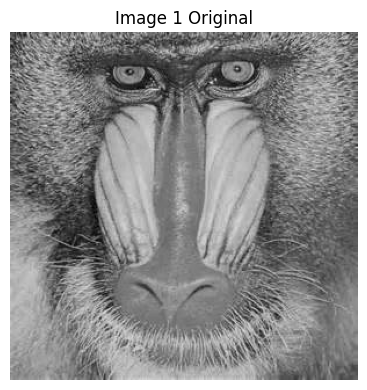

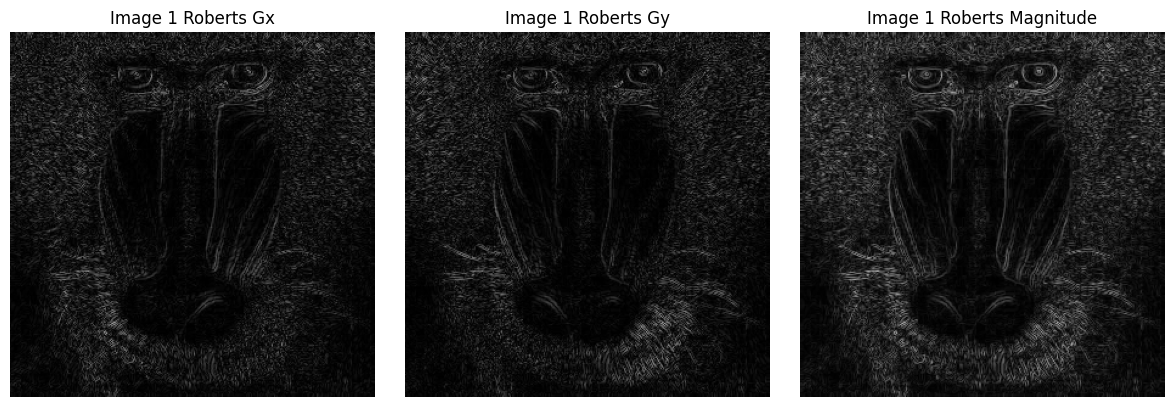

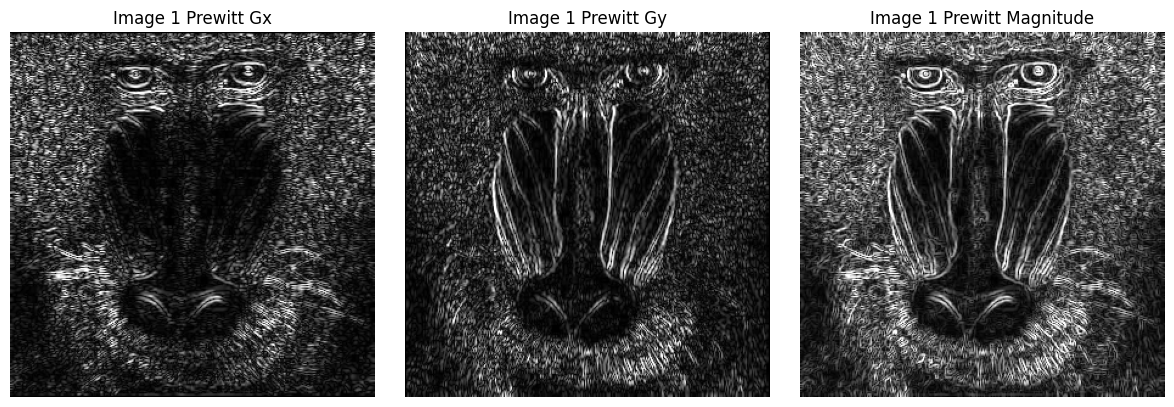

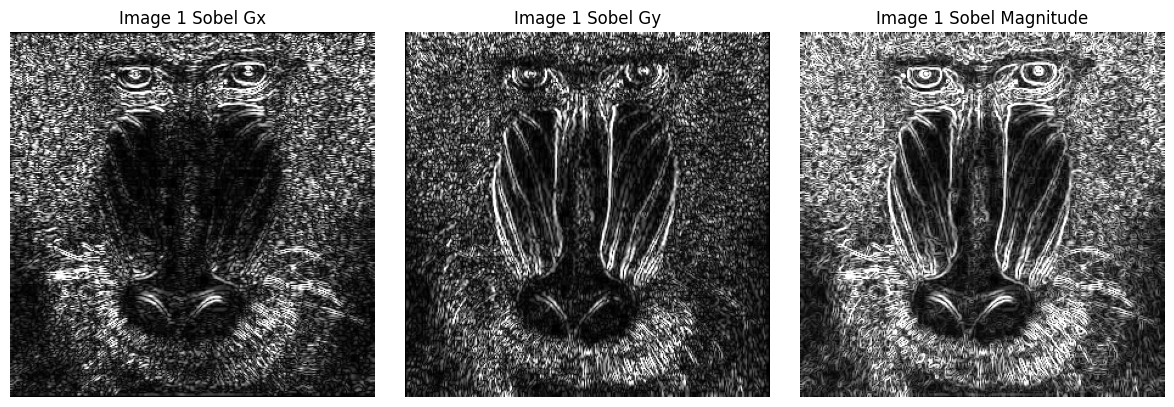

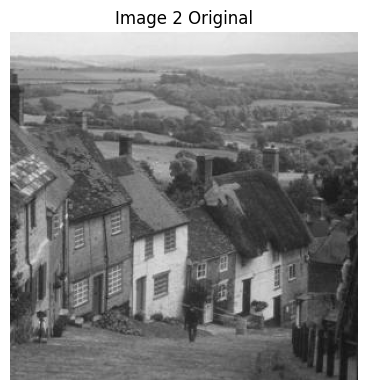

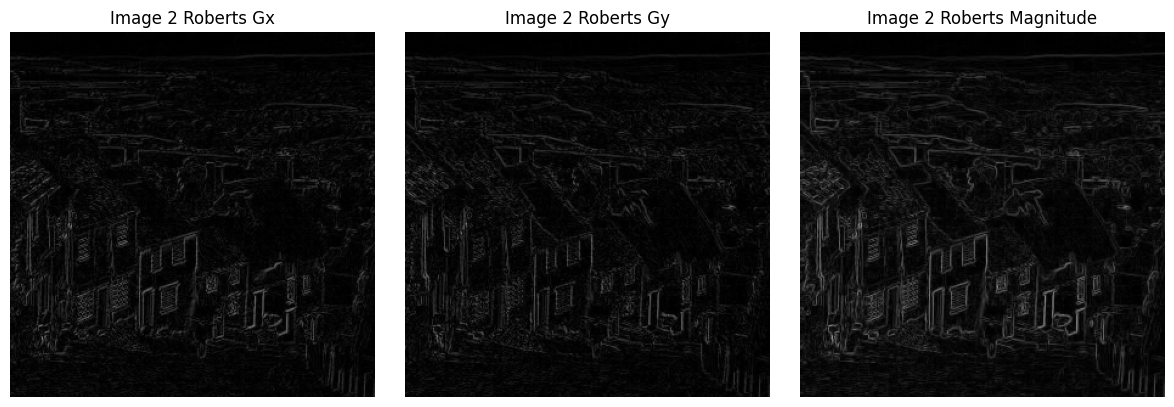

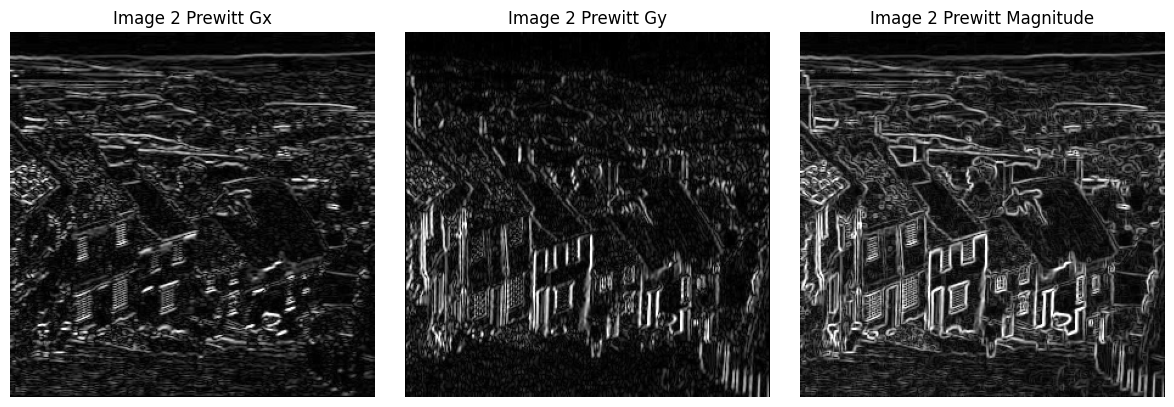

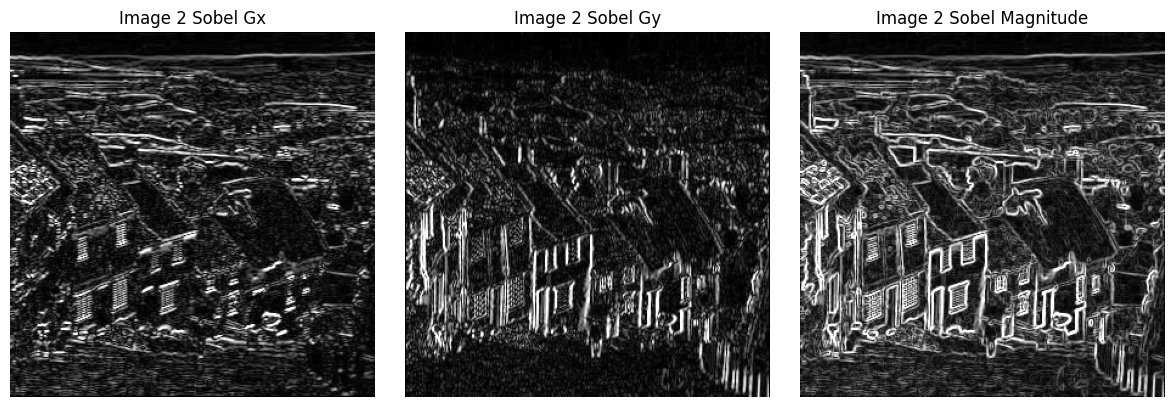

In [12]:
# Apply to both images
results_img1 = apply_all_gradient_filters(img1, kernels)
results_img2 = apply_all_gradient_filters(img2, kernels)

# Show all results for Image 1
show_gradient_results(img1, results_img1, title_prefix="Image 1")

# Show all results for Image 2
show_gradient_results(img2, results_img2, title_prefix="Image 2")


## Built-in filter wrapper

In [13]:
def builtin_gradient(image, kernel_x, kernel_y):
    """Apply OpenCV filter2D with given kernels and compute magnitude."""
    gx = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    gy = cv2.filter2D(image, cv2.CV_64F, kernel_y)
    mag = np.sqrt(gx**2 + gy**2)
    return (
        cv2.convertScaleAbs(gx),
        cv2.convertScaleAbs(gy),
        cv2.convertScaleAbs(mag)
    )

## Compare function

In [14]:
def compare_custom_builtin(image, kernel_x, kernel_y, title_prefix="", filter_name=""):
    """Compare custom gradient_filter output with OpenCV filter2D output."""
    # Custom
    gx_custom, gy_custom, mag_custom = gradient_filter(image, kernel_x, kernel_y)
    gx_custom = cv2.convertScaleAbs(gx_custom)
    gy_custom = cv2.convertScaleAbs(gy_custom)
    mag_custom = cv2.convertScaleAbs(mag_custom)

    # Built-in (using filter2D)
    gx_builtin, gy_builtin, mag_builtin = builtin_gradient(image, kernel_x, kernel_y)

    # Compare side-by-side
    show_images([gx_custom, gx_builtin],
                [f"{title_prefix} Custom {filter_name} Gx", f"{title_prefix} Built-in {filter_name} Gx"],
                figsize=(8, 4))
    show_images([gy_custom, gy_builtin],
                [f"{title_prefix} Custom {filter_name} Gy", f"{title_prefix} Built-in {filter_name} Gy"],
                figsize=(8, 4))
    show_images([mag_custom, mag_builtin],
                [f"{title_prefix} Custom {filter_name} Mag", f"{title_prefix} Built-in {filter_name} Mag"],
                figsize=(8, 4))


## Comparing cv2.filter2D vs cv2.Sobel

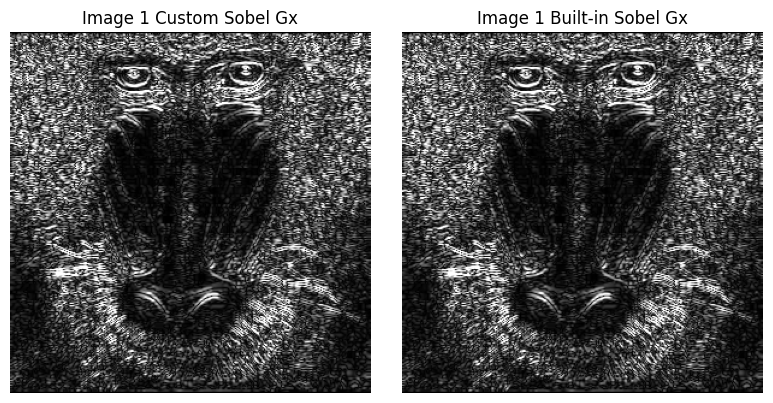

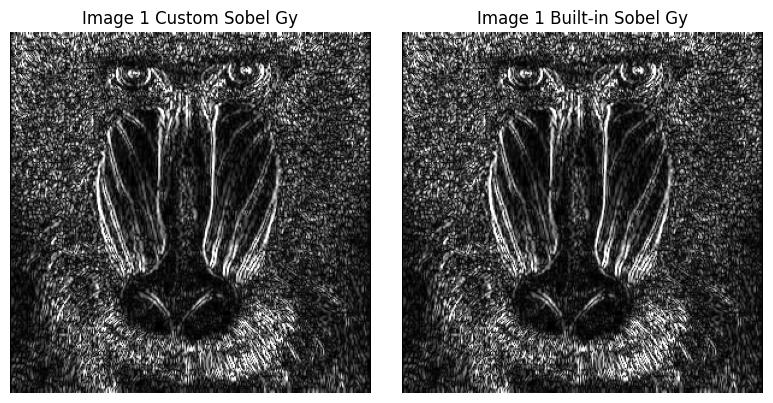

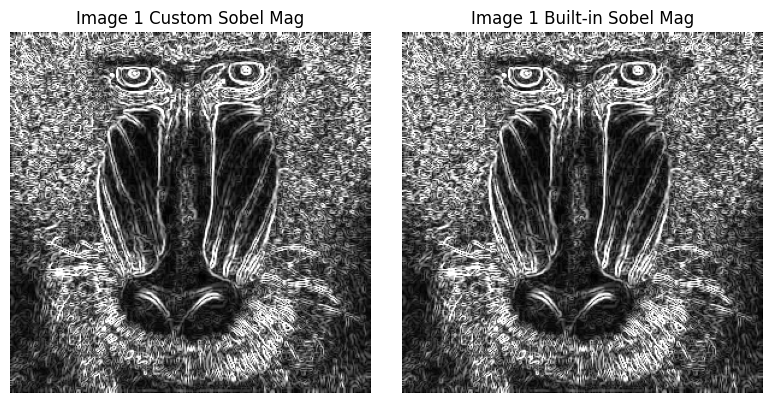

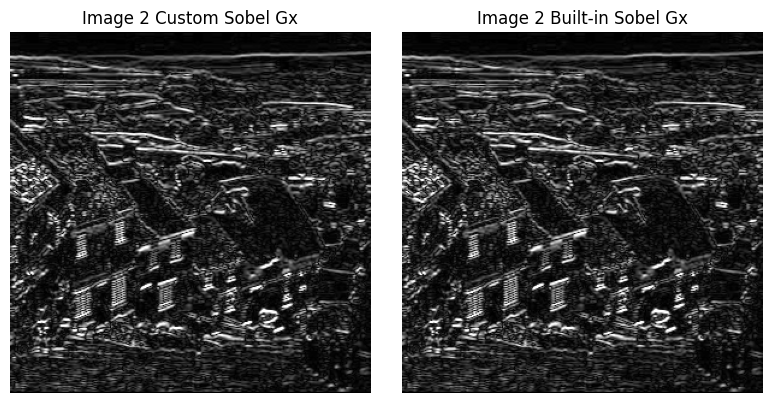

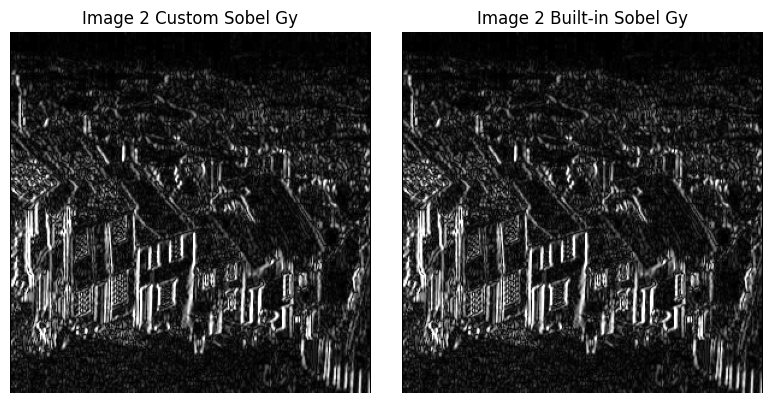

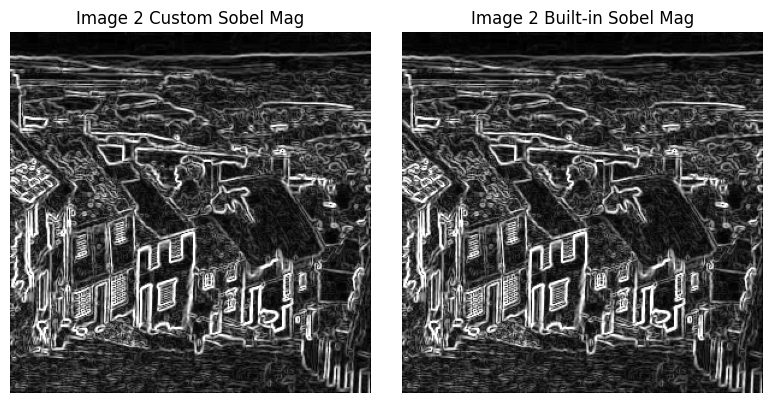

In [15]:
# Compare Sobel
compare_custom_builtin(img1, sobel_x, sobel_y, title_prefix="Image 1", filter_name="Sobel")
compare_custom_builtin(img2, sobel_x, sobel_y, title_prefix="Image 2", filter_name="Sobel")

## Observations

### 1. Mean Filter (3×3)
- Applied using `cv2.filter2D` with a uniform averaging kernel.  
- Smooths the image by averaging pixel values in the neighborhood.  
- Effectively reduces small random noise but also blurs edges and fine details.  

### 2. Roberts Operator (2×2)
- Implemented by defining Roberts kernels and applying them via `cv2.filter2D`.  
- Detects edges primarily along diagonal directions.  
- Produces thin, sharp edges but is sensitive to noise due to the small kernel size.  

### 3. Prewitt Operator (3×3)
- Applied using `cv2.filter2D` with Prewitt horizontal and vertical kernels.  
- Detects horizontal and vertical edges with equal weighting across rows/columns.  
- Produces thicker edges than Roberts and is less sensitive to noise.  

### 4. Sobel Operator (3×3) — `cv2.filter2D` Implementation
- Applied with Sobel kernels via `cv2.filter2D`.  
- Uses larger central weights, giving smoother and stronger edges compared to Prewitt.  
- Shows better noise suppression while preserving prominent edges.  

### 5. Sobel Operator — OpenCV Built-in (`cv2.Sobel`)
- Applied using the dedicated `cv2.Sobel` function for both X and Y gradients.  
- Gradient magnitude and direction closely match the `cv2.filter2D` implementation.  
- Any differences are minimal and can be attributed to internal optimizations or rounding.  

### 6. Comparison Summary
- For Roberts, Prewitt, and Sobel, the `cv2.filter2D` approach produced results visually identical to OpenCV’s built-in Sobel function (when comparing Gx, Gy, and gradient magnitude).  
- This confirms that both methods perform convolution consistently, and kernel definitions are the main factor influencing the results.  
